# Homework 3 - Ames Housing Dataset

### **Import Libraries**

In [0]:
# Upload Data from Google Drive
from google.colab import drive

# Store Data in Pandas Dataframe
import pandas as pd

# Numerical functions
import numpy as np

# Label Encoding
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

# For Correlation Coefficients
from scipy.stats import pearsonr
from scipy.stats import spearmanr

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
tips = sns.load_dataset("tips")
sns.set(style='whitegrid', palette="deep", font_scale=1.1)

# Distance Function
from scipy.spatial import distance

# K-Means Clustering
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Split DF into Test and Train
from sklearn.model_selection import train_test_split

# RMSE
from sklearn.metrics import mean_squared_error

# Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
import xgboost as xgb
from lightgbm import LGBMRegressor

# Permutation Test
from mlxtend.evaluate import permutation_test

# For Image
from google.colab import files
from IPython.display import Image

### **Mount Data**

In [2]:
### From Google Drive

# Mount drive at location
drive.mount('/content/drive')

# Get file paths from mounted location
train_path = "/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Datasets/train.csv"
test_path = "/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Datasets/test.csv"

# Read CSV and store in Pandas Dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### **Data Processing**

In [3]:
# Drop columns with more than 1000 NaN values (Out of 1460 rows)
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1) 
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1970.0,Fin,2.0,525.0,TA,TA,Y,240,0,0,0,0,0,0,

In [4]:
# Check for NaN values
pd.DataFrame({'Train Data': train_df.isna().sum(), 'Test Data': test_df.isna().sum()})

,Train Data,Test Data
1stFlrSF,0,0.0
2ndFlrSF,0,0.0
3SsnPorch,0,0.0
Alley,1369,1352.0
BedroomAbvGr,0,0.0
BldgType,0,0.0
BsmtCond,37,45.0
BsmtExposure,38,44.0
BsmtFinSF1,0,1.0
BsmtFinSF2,0,1.0


In [0]:
# Replace NaN values

# For training set:

# Replace NaN values with 'mean' in columns with numerical data (float64)
float64_cols = train_df.columns[train_df.dtypes=='float64']
train_df[float64_cols] = train_df[float64_cols].fillna(train_df.mean().iloc[0])

# Replace NaN values with 'mean' in columns with numerical data (int64)
int64_cols = train_df.columns[train_df.dtypes=='int64']
train_df[int64_cols] = train_df[int64_cols].fillna(train_df.mean().iloc[0])

# Replace NaN values with 'mode' in columns with categorical data (object)
object_cols = train_df.columns[train_df.dtypes=='object']
train_df[object_cols] = train_df[object_cols].fillna(train_df.mode().iloc[0])
                                                                          
                                                                          
# For test set:

# Replace NaN values with 'mean' in columns with numerical data (float64)
float64_cols = test_df.columns[test_df.dtypes=='float64']
test_df[float64_cols] = test_df[float64_cols].fillna(test_df.mean().iloc[0])

# Replace NaN values with 'mean' in columns with numerical data (int64)
int64_cols = test_df.columns[test_df.dtypes=='int64'] #
test_df[int64_cols] = test_df[int64_cols].fillna(test_df.mean().iloc[0])

# Replace NaN values with 'mode' in columns with categorical data (object)
object_cols = test_df.columns[test_df.dtypes=='object']
test_df[object_cols] = test_df[object_cols].fillna(test_df.mode().iloc[0])

In [0]:
# Label Encoding

# Make copy of data
train_num_df = train_df.copy()
test_num_df = test_df.copy()

# For training set
# Categorical boolean mask
cat_ft1 = train_num_df.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols1 = train_num_df.columns[cat_ft1].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
train_num_df[cat_cols1] = train_num_df[cat_cols1].apply(lambda col: le.fit_transform(col.astype(str)))

# For test set
# Categorical boolean mask
cat_ft2 = test_num_df.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols2 = test_num_df.columns[cat_ft2].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
test_num_df[cat_cols2] = test_num_df[cat_cols2].apply(lambda col: le.fit_transform(col.astype(str)))

## Part 1 - Pairwise Correlations

In [0]:
# Select Best Features based on best prediction for target = SalePrice

# Data
X = train_num_df.iloc[:, 1:-1]  # Independent columns
Y = train_num_df.iloc[:, -1]    # Target column i.e Sale Price

### **Univariate Selection - SelectKBest**

In [8]:
# Apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
model = bestfeatures.fit(X,Y)

# Create dataframes with output
columns_df = pd.DataFrame(X.columns)
scores_df = pd.DataFrame(model.scores_)

# Concat two dataframes for better visualization 
featureScores = pd.concat([columns_df,scores_df],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score'))

           Specs         Score
3        LotArea  1.011497e+07
74       MiscVal  6.253332e+06
43      2ndFlrSF  4.648841e+05
33    BsmtFinSF1  3.999851e+05
70      PoolArea  3.835642e+05
35    BsmtFinSF2  3.688827e+05
25    MasVnrArea  3.021840e+05
36     BsmtUnfSF  2.747512e+05
44  LowQualFinSF  2.448810e+05
2    LotFrontage  2.342919e+05
45     GrLivArea  1.968501e+05
37   TotalBsmtSF  1.747065e+05
68     3SsnPorch  1.549360e+05
69   ScreenPorch  1.366295e+05
65    WoodDeckSF  1.298338e+05


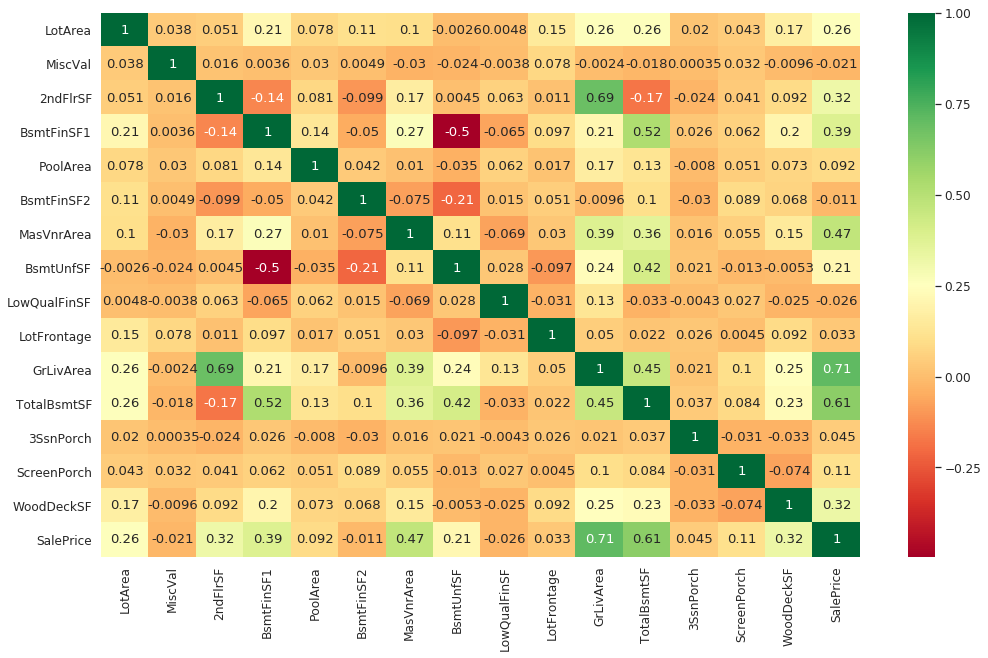

In [9]:
# Get Correlation
cols = list(((featureScores.nlargest(15,'Score')).index)+1)

# Add SalePrice to Best Features to compare correlation
cols.append(80)
temp_df = train_num_df.iloc[:,cols]

corrmat = temp_df.corr()
top_corr_features = corrmat.index

# Plot Heat Map
plt.figure(figsize=(17,10))
g=sns.heatmap(temp_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### **Feature Importance**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


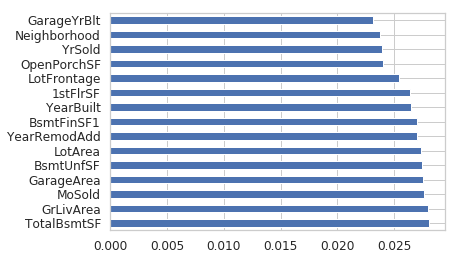

In [10]:
# Build Model
model = ExtraTreesClassifier()
model.fit(X,Y)

# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

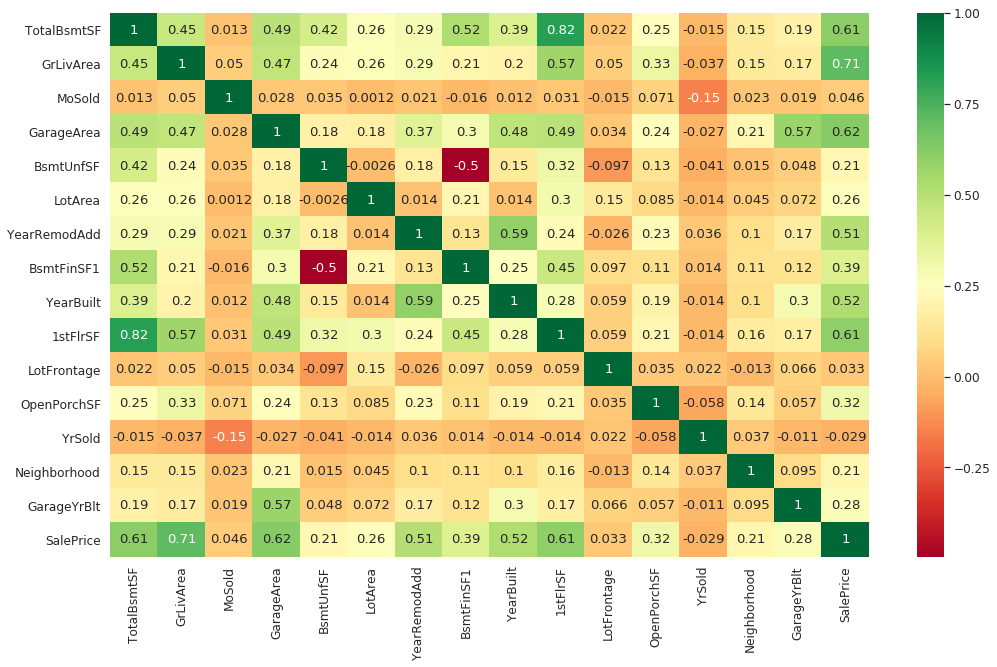

In [11]:
# Get Correlation

# Select 15 Features
cols = list((feat_importances.nlargest(15)).index)

# Add SalePrice to Best Features to compare correlation
cols.append('SalePrice')
temp_df = train_num_df[cols]

# Find Correlation
corrmat = temp_df.corr()
top_corr_features = corrmat.index

# Plot Heat Map
plt.figure(figsize=(17,10))
g=sns.heatmap(temp_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

To find the best 15 features w.r.t. Sale Price, we have used two methods:

1. SelectKBest
2. Feature Importance

Amongst these, 'Feature Importance' gives features with higher positive correlation than 'SelectKBest'. In terms of least negative correlation, there is no difference.

Therefore, we will consider the second set of 15 features obtained by the 'Feature Importance' method.

**Highest Positive Correlation = 0.83** (GrLivArea and TotRmsAbvGrd)

This signifies that more the ground living area, there will mostly be more number of rooms.

**Highest Positive Correlation with SalePrice = 0.71** (GrLivArea)

This signifies that larger the ground living area in square feet, the Sale price of the house will be higher.

**Least Negative Correlation = -0.5** (BsmtFinSF1 and BsmtUnfSF)

This signifies that the Type 1 Finished Square Feet Area will mostly be opposite to the Unfinished Basement Area in Square Feet. Therefore, the correlation is negative.

**Least Negative Correlation with SalePrice**

There is no feature amongst these 15 features which gives a significant negative correlation with SalePrice which can be used in its prediction.

## Part 2 - Informative Plots

### **Scatter Plot**

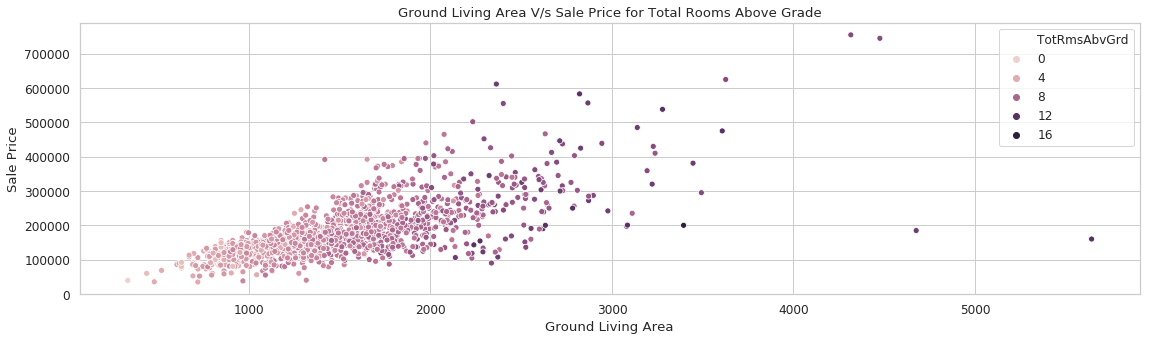

In [12]:
fig = plt.figure(figsize=(19,5))
sns.scatterplot(data=train_df, x="GrLivArea", y="SalePrice", hue="TotRmsAbvGrd").set(xlabel='Ground Living Area', ylabel='Sale Price', title='Ground Living Area V/s Sale Price for Total Rooms Above Grade');

From this Scatter plot we can infer: 

There is a strong positive correlation between the Ground Living Area, Total number of rooms and the Sale Price of the houses.

As the Ground Living Area increases, the Sale Price also increases. This is a linear relationship.

Also, the Total number of rooms is proportional to the Ground Living Area. The more the area, the more the number of rooms.

### **Line Chart**

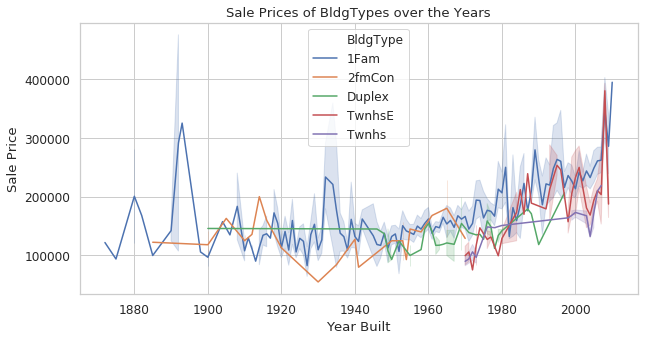

In [13]:
fig = plt.figure(figsize=(10,5))
sns.lineplot(data=train_df, x="YearBuilt", y="SalePrice", hue="BldgType").set(xlabel='Year Built', ylabel='Sale Price', title='Sale Prices of BldgTypes over the Years');


From this Line plot we can infer: 

1. **Single-family Detached:** Originally these were the type of houses that existed and were sold before the year 1885.
2. **Two-family Conversion:** After the year 1880, there were these kind of houses that were built and sold. Although, Single-family houses were sold more than Two-family houses.
3. **Duplex:** These houses started being sold after the year 1900. It was sold at a constant rate for a few years. But after the year 1950, single family houses were still more frequent.
4. **Townhouse End Unit, Townhouse Inside Unit:** Both these type of houses started being sold after 1970. In the years around 2000, the Single family and Townhouse End Unit have similar frequency of sale.

### **Bar Graph**

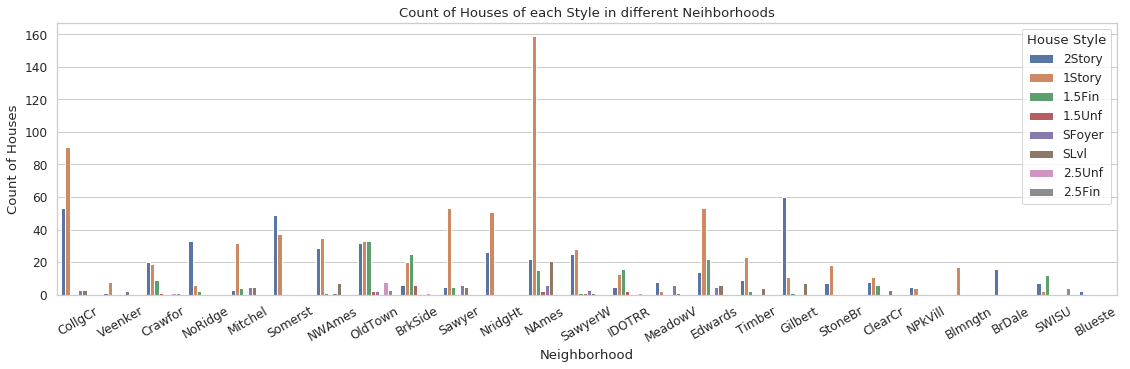

In [14]:
fig = plt.figure(figsize=(19,5))
g = sns.countplot(data=train_df, x='Neighborhood', hue='HouseStyle')
g.set(xlabel='Neighborhood', ylabel='Count of Houses', title='Count of Houses of each Style in different Neihborhoods');
g.set_xticklabels(g.get_xticklabels(), rotation=30)
g.legend(loc='upper right',title='House Style')

From this Bar plot we can infer:

There are different types of houses in different neighborhoods. In most neighborhoods, one-story houses are in majority.

**Names neighborhood:** It has the highest number of houses amongst all neighborhoods. Also, in this the one-story houses are in majority.

**NoRidge, Somerst, Gilbert and BrDale neighborhoods:** In these, majority of the houses are two-story houses.

**OldTown neighborhood:** In this, there are almost equal number of one-story, two-story and one and a half story house with 2nd level finished.

The rest of the type of houses are very less in number and hence they are insignificant.

### **Histogram**

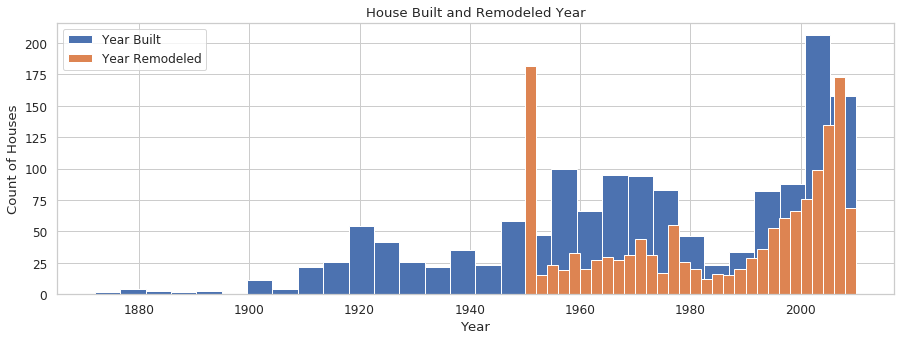

In [15]:
fig = plt.figure(figsize=(15,5))

sns.distplot(
    train_df['YearBuilt'], norm_hist=False, kde=False, bins=30, hist_kws={"alpha": 1}, label='Year Built'
)

g = sns.distplot(
    train_df['YearRemodAdd'], norm_hist=False, kde=False, bins=30, hist_kws={"alpha": 1}, label='Year Remodeled'
)

g.set(xlabel='Year', ylabel='Count of Houses', title='House Built and Remodeled Year');
g.legend(loc="upper left")

plt.show()

From this histogram we can infer:

We have data of the houses being built from the year 1870 approximately. Initial data only shows the year the houses were built.

From the year 1950, these houses began to be remodeled. For the houses which haven't been remodeled, the remodeled year = year in which it was buit. 

The year 1950 has the highest count of the number of houses being remodeled. This is due to the fact that the houses built before that all show remodeled date from 1950 onwards. 

After that the count of the houses being built are almost proportional to the count of the houses being remodeled (Since this data also consists of houses being built).

### **Box Plot**

[Text(0.5, 1.0, 'Sale Price of houses wrt Overall Quality and Central Air Conditioning')]

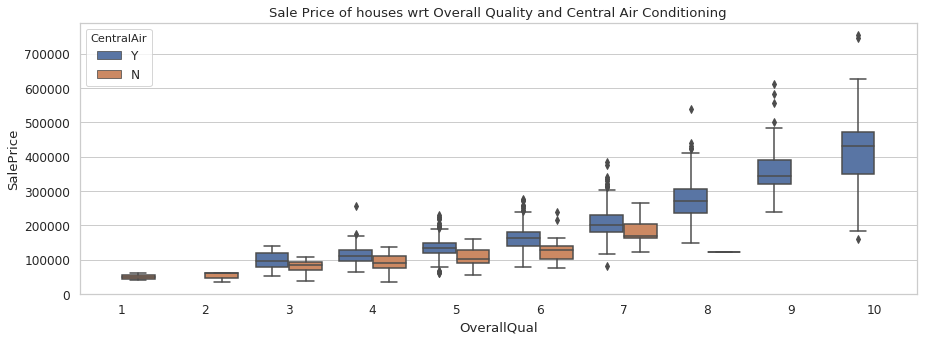

In [16]:
fig = plt.figure(figsize=(15,5))

sns.boxplot(data=train_df, x="OverallQual", y="SalePrice", hue="CentralAir").set(title='Sale Price of houses wrt Overall Quality and Central Air Conditioning')

From this Box Plot we can infer:

In this, Overall Quality refers to the quality of the material and finish of the house.

As the Overall Quality of the houses increase, the price of the houses also increase. Also, the range of the prices increases slightly for the one's with Central Air Conditioning.

Also, for the same quality of house, if the house has Central Air Conditioning, the Sale Price will be more than the house without Central Air Conditioning.

For the houses with Quality above 8, almost all the houses have Central Air Conditioning.

## Part 3 - Handcrafted Scoring Function

In [17]:
# Data
train = train_num_df.copy() 
corr_pearson = train.corr()

train_corr = corr_pearson['SalePrice'].copy()    
train = train[train_corr.index] 
train_corr.drop(labels = ['Id'],inplace=True) 
train_corr.drop(labels = ['SalePrice'],inplace=True)

sum = train_corr.values.sum() 

# Score of house = Sum of values of each column multiplied by weight for column
for index,val in train_corr.iteritems():    
  train_corr[index] = val/sum 

Id = train['Id'] 
SalePrice = train['SalePrice'] 
train.drop(['Id','SalePrice'], axis=1, inplace=True) 
train['Score'] = train.dot(train_corr) 
train['Id'] = Id 
train['SalePrice'] = SalePrice
  
# Get Most and Least Desirable Houses
train.set_index('Id', inplace=True) 

print("Top 10 Desirable Houses: \n") 
print(train.nlargest(10,'Score'))

print("\n\n\nTop 10 Least Houses: \n") 
print(train.nsmallest(10,'Score'))


Top 10 Desirable Houses: 

      MSSubClass  MSZoning  LotFrontage  ...  SaleCondition        Score  SalePrice
Id                                       ...                                       
314           20         3        150.0  ...              4  7609.339380     375000
336          190         3        730.5  ...              4  5962.111267     228950
250           50         3        730.5  ...              4  5807.249689     277000
707           20         3        730.5  ...              4  4472.252898     302000
1299          60         3        313.0  ...              5  4046.622285     160000
452           20         3         62.0  ...              4  2972.257734     280000
770           60         3         47.0  ...              4  2750.104137     538000
524           60         3        130.0  ...              5  2726.026764     184750
54            20         3         68.0  ...              4  2484.672933     385000
385           60         3        730.5  ...     

**The Id's of the 10 most desirable houses are:**
1. 314 
2. 336 
3. 250 
4. 707 
5. 1299
6. 452 
7. 770 
8. 524 
9. 54 
10. 385


**The Id's of the 10 least desirable houses are:**

1. 615 
2. 534 
3. 650 
4. 1450 
5. 435 
6. 711 
7. 1040 
8. 490 
9. 1039 
10. 1338




**Description and Working of Scoring Function:**

The basis of the scoring function created is the correlation of the features w.r.t. the target feature i.e. SalePrice.

Each feature has been given a value based on the correlation. These values have been normalized in such a way that the sum of values of all features equals 1. These values are called weights.

The idea behind this function is that the more the correlation of the feature with the SalePrice, more weightage that feature has in its prediction. Also, the houses which are more desirable will have higher cost.

## Part 4 - Pairwise Distance Function

In [18]:
# Custom distance function 
train = train_num_df.copy()
train_target_df = train.drop("SalePrice", axis=1) 
customDist = distance.cdist(train_target_df, train_target_df, lambda x,y: np.sqrt(np.sum((x-y)**3)))
print(customDist)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


[[     0.                     nan             nan ...             nan
              nan             nan]
 [ 31343.46710241      0.                     nan ...             nan
              nan             nan]
 [148207.26523015  71210.59722401      0.         ...             nan
   24335.95580617             nan]
 ...
 [139766.74246043 145408.42465965  90518.49800455 ...      0.
  135662.67408539 132371.51139124]
 [ 71383.12488257  57721.92664837             nan ...             nan
       0.                     nan]
 [ 78755.58076733  56865.14737517  22432.82467724 ...             nan
   12347.68018698      0.        ]]


In [19]:
# Create a 2D matrix of SalePrice differences
# Compare this distance with the custom distance function matrix
spDist = np.zeros(shape=(len(train.index),len(train.index)))

for i in range(len(train.index)):
  for j in range (len(train.index)):
    spDist[i][j] = abs(train['SalePrice'].values[i]-train['SalePrice'].values[j])
  
print(spDist)


[[     0.  27000.  15000. ...  58000.  66375.  61000.]
 [ 27000.      0.  42000. ...  85000.  39375.  34000.]
 [ 15000.  42000.      0. ...  43000.  81375.  76000.]
 ...
 [ 58000.  85000.  43000. ...      0. 124375. 119000.]
 [ 66375.  39375.  81375. ... 124375.      0.   5375.]
 [ 61000.  34000.  76000. ... 119000.   5375.      0.]]


[Text(0.5, 1.0, 'SP Distance Matrix')]

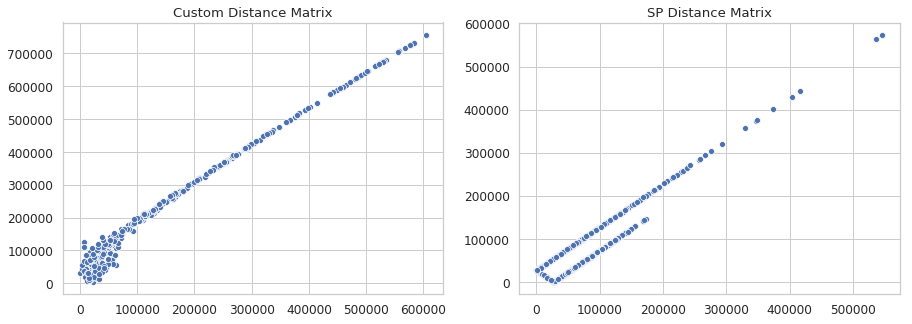

In [20]:
# Figure showing similarity between the 2 distance matrix
fig = plt.figure(figsize=(15, 5)) 

# Plot Custom Distance Matrix
plt.subplot(1, 2, 1) 
sns.scatterplot(x=customDist[0], y=customDist[1]).set(title='Custom Distance Matrix')

# Plot sp_distance_matrix
plt.subplot(1, 2, 2) 
sns.scatterplot(x=spDist[0], y=spDist[1]).set(title='SP Distance Matrix')

**Working of the Distance Function:**

**Custom Distance Function:** It is the square root of sum of cubes of differences between vectors. 

**SP Distance Function:** It is absolute difference between the vectors.



**Outcome:**

The custom distance function is very close to the difference values between the Sale Price of each house. Also, from the graph we can see that it gives results silimar to the SP Distance Function.

Hence, we can say that the custom distance function myDist works well against the Sale Price.


## Part 5 - Clustering

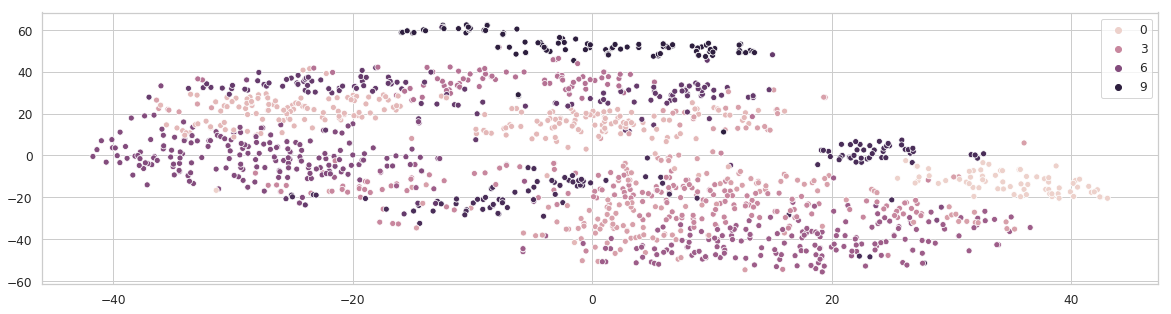

In [21]:
# Normalize the data
x = train_num_df.values
min_max_scaler = preprocessing.MinMaxScaler() 
df = pd.DataFrame(min_max_scaler.fit_transform(x))

# code for clustering and visualization 
kmeans = KMeans(n_clusters=10) 
kmeans.fit(df) 
y_kmeans = kmeans.predict(df) 
X_embedded = TSNE(n_components=2).fit_transform(df) 
fig = plt.figure(figsize=(20, 5)) 
ax = sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_kmeans)

K means clustering algorithm clusters the data into K number of clusters. In the above example we have considered number of clusters (k) = 10. The clustering of the data is done based on a Euclidean Distance Metric.

The clusters are very evident, but the boundaries between them are not very clear. There will be a little overlapping between the clusters which can be seen in the above Scatter Plot.

## Part 6 - Linear Regression

In [0]:
# Training data for scoring
Y = train_num_df['SalePrice'].values.reshape(-1,1)

# Split Data into train and test
train_data, test_data = train_test_split(train_num_df,train_size=0.9)

# Y - Train & Test
Y_train = train_data['SalePrice'].values.reshape(-1,1)
Y_test = test_data['SalePrice'].values.reshape(-1,1)

### **Single Variable**

#### **TotRMSAbvGrd**

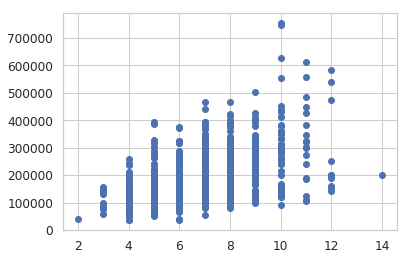

In [23]:
# Training data for scoring
X = train_num_df['TotRmsAbvGrd'].values.reshape(-1,1)

# X - Train & Test
X_train = train_data['TotRmsAbvGrd'].values.reshape(-1,1)
X_test = test_data['TotRmsAbvGrd'].values.reshape(-1,1)

# Scatter Plot to check Linear Relationship
plt.scatter(X, Y)

In [24]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.2695055667806402
RMSE: 0.3935694665897684


#### **TotalBsmtSF**

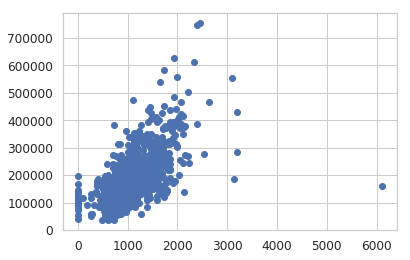

In [25]:
# Training data for scoring
X = train_num_df['TotalBsmtSF'].values.reshape(-1,1)

# X - Train & Test
X_train = train_data['TotalBsmtSF'].values.reshape(-1,1)
X_test = test_data['TotalBsmtSF'].values.reshape(-1,1)

# Scatter Plot to check Linear Relationship
plt.scatter(X, Y)

In [26]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.3758423948104185
RMSE: 0.38890396396452753


#### **GarageArea**

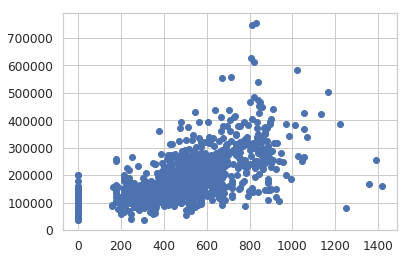

In [27]:
# Training data for scoring
X = train_num_df['GarageArea'].values.reshape(-1,1)

# X - Train & Test
X_train = train_data['GarageArea'].values.reshape(-1,1)
X_test = test_data['GarageArea'].values.reshape(-1,1)

# Scatter Plot to check Linear Relationship
plt.scatter(X, Y)

In [28]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.38301542550020684
RMSE: 0.3567089454760503


#### **GrLivArea**

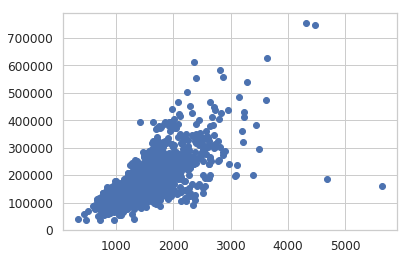

In [29]:
# Training data for scoring
X = train_num_df['GrLivArea'].values.reshape(-1,1)

# X - Train & Test
X_train = train_data['GrLivArea'].values.reshape(-1,1)
X_test = test_data['GrLivArea'].values.reshape(-1,1)

# Scatter Plot to check Linear Relationship
plt.scatter(X, Y)

In [30]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.48917982205297683
RMSE: 0.3210875511613978


### **Multiple Variables**

#### **15 best Features from SelectKBest method**

In [0]:
# Training data for scoring
cols1 = list(((featureScores.nlargest(15,'Score')).index)+1)
X = train_num_df.iloc[:,cols1]

# X - Train & Test
X_train = train_data.iloc[:,cols1]
X_test = test_data.iloc[:,cols1]

In [32]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.6440259322269253
RMSE: 0.26141313459287213


#### **15 best Features from Feature Importance method**

In [0]:
# Training data for scoring
cols2 = list((feat_importances.nlargest(15)).index)
X = train_num_df[cols2]

# X - Train & Test
X_train = train_data[cols2]
X_test = test_data[cols2]

In [34]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.7252967536763658
RMSE: 0.24237704205523633


#### **Features from entire dataset**

In [0]:
# Training data for scoring
X = train_num_df.iloc[:,0:-1]

# X - Train & Test
X_train = train_data.iloc[:,0:-1]
X_test = test_data.iloc[:,0:-1]

In [36]:
# Create and fit Model
model = LinearRegression().fit(X_train, Y_train)

# Predict SalePrice for test data
Y_pred = model.predict(X_test)

# Output
r_sq = model.score(X_train, Y_train)
print('Coefficient of Determination (Score):', r_sq)

rms = np.sqrt(mean_squared_error(np.log(Y_test), np.log(Y_pred)))
print('RMSE:', rms)

Coefficient of Determination (Score): 0.8501824261065096
RMSE: 0.15684179315787988


**Single Variables:**

We considered some of the best features obtained by the 'Feature Importance' method. By performing linear regression, we observed the following:

**TotRMSAbvGrd:** Score=0.283 , RMSE=0.360

**TotalBsmtSF:** Score=0.364 , RMSE=0.314

**GarageArea:** Score=0.388 , RMSE=0.321

**GrLivArea:** Score=0.502 , RMSE=0.287

We can see the Scatter Plot which reflects how linear the feature is wrt to Sale Price.

From these features we can see that **GrLivArea** is the best feature with highest score and lowest Root Mean Squared Error when used independently to predict SalePrice.

**Multiple Variables:**

Since individual features alone cannot give a good prediction of the target, we considered a combination of features. By performing linear regression, we observed the following:

**Features from SelectKBest Method:** Score=0.648 , RMSE=0.214

**Features from Feature Importance Method:** Score=0.778 , RMSE=0.180

**Entire Dataset:** Score=0.852 , RMSE=0.189

As compared to the linear performed on individual features, we observe that considering a combination of features gives a better score and a lower Root Mean Squared Error.

The highest score is obtained when the entire Dataset is considered. 

But, the error of the entire dataset is higher than the features from the Feature Importance method. This is because the entire dataset consists of a number of irrelevant or noisy features. These features increase the error.

Therefore, we conclude that, more the number of good features, better the score and lower the error. But we need to ensure we consider only good features and reduce the irrelevant ones.

## Part 7 - External Dataset

In [0]:
# Read CSV and store in Pandas Dataframe
external_data_path = "/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Datasets/External_Dataset.xls"
external_train_df = pd.read_excel(external_data_path)
external_test_df = pd.read_csv(test_path)
new_df = pd.read_csv(train_path)

# Rename Order column of external dataset to Id
external_train_df.rename(columns={"Order": "Id"}, inplace = True)

# Merge original dataset with external dataset
new_df = pd.merge(external_train_df[['Id','PID']], new_df, on='Id', how='right') 
external_test_df = pd.merge(external_train_df[['Id','PID']], external_test_df, on='Id', how='right')
new_df.columns = new_df.columns.str.replace(' ', '')


In [0]:
# Data Processing

# Drop Id (Not required)
external_train_df.drop(['Id'], axis=1, inplace=True)

# Store ID for external dataset
Tid = external_test_df['Id']

# Train Data
new_df.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)
new_df[new_df.columns[new_df.dtypes=='int64']]=new_df[new_df.columns[new_df.dtypes=='int64']].fillna(new_df.mean())
new_df[new_df.columns[new_df.dtypes=='float64']]=new_df[new_df.columns[new_df.dtypes=='float64']].fillna(new_df.mean())
new_df[new_df.columns[new_df.dtypes=='object']]=new_df[new_df.columns[new_df.dtypes=='object']].fillna(new_df.mode().iloc[0])

# Test Data
external_test_df.drop(['Id','MiscFeature','PoolQC','Fence','Alley'], axis=1, inplace=True)
external_test_df[external_test_df.columns[external_test_df.dtypes=='int64']]=external_test_df[external_test_df.columns[external_test_df.dtypes=='int64']].fillna(external_test_df.mean())
external_test_df[external_test_df.columns[external_test_df.dtypes=='float64']]=external_test_df[external_test_df.columns[external_test_df.dtypes=='float64']].fillna(external_test_df.mean())
external_test_df[external_test_df.columns[external_test_df.dtypes=='object']]=external_test_df[external_test_df.columns[external_test_df.dtypes=='object']].fillna(external_test_df.mode().iloc[0])


In [39]:
X = new_df[[col for col in new_df.columns if col != 'SalePrice']] 
Y = new_df['SalePrice']

cat_cols = X.dtypes==object 
cat_cols = X.columns[cat_cols].tolist() 

le = preprocessing.LabelEncoder() 
X[cat_cols] = X[cat_cols].apply(lambda col: le.fit_transform(col.astype(str))) 

cat_cols = external_test_df.dtypes==object 
cat_cols = external_test_df.columns[cat_cols].tolist() 

le = preprocessing.LabelEncoder() 
external_test_df[cat_cols] = external_test_df[cat_cols].apply(lambda col: le.fit_transform(col.astype(str)))


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [40]:
# Train Model
model = (LGBMRegressor(objective='regression', n_estimators=300, learning_rate=0.05)).fit(X, Y)

# Prediction
Y_pred = model.predict(external_test_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/lgbm_external.csv", index=False)

# Score
print(model.score(X, Y))

0.989212267202004


The source for the external dataset is: http://www.amstat.org/publications/jse/v19n3/decock/AmesHousing.xls
 
It is an extension of the Ames Housing dataset. There is an extra column 'PID' in this external dataset which is the Parcel Identication Number assigned to each house.

We merged this dataset with the original dataset and used LGBM Regressor to create a model. This external dataset does not improve the prediction.

The Kaggle Score for this model: 0.13383

## Part 8 - Permutation Test

In [41]:
# Data
X = train_num_df.iloc[:,0:-1]
Y = train_num_df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# From 'Feature Importance' method:
# Choose 5 vairables with best correlation with SalePrice and 5 vairables with worst correlation with SalePrice
cols = list((feat_importances.nlargest(5)).index)
cols += (list((feat_importances.nsmallest(5)).index))

# Find permutation test value for each feature
print("P-test values:")
for c in cols:

    regr = LinearRegression()
    regr.fit(np.reshape(X_train[c].values, (-1, 1)), np.reshape(y_train.values, (-1, 1)))
    y_pred = regr.predict(np.reshape(X_test[c].values, (-1, 1)))

    p_value = permutation_test(y_pred.flatten(), y_test, method='approximate', func=lambda x, y: np.sqrt(mean_squared_error(np.log(x), np.log(y))), seed=0)
    print(c, p_value)


P-test values:
TotalBsmtSF 1.0
GrLivArea 1.0
MoSold 0.335
GarageArea 1.0
BsmtUnfSF 0.853
Utilities 0.297
PoolQC 0.325
MiscFeature 0.307
Street 0.341
Condition2 0.253


We are using Permutation test to estimate the precision of dataset based on sampling the dataset. We shuffle the observed data by assigning different outcome values to each observation from among the set of actually observed outcomes.

Lower the pvalue, the higher the likelihood that the result was actually right and not just random.

For few of the features, the p_value is low which suggests that the actual output we received is right. Whereas for some features this does not stand true. This shows that these features aren't relevant and the actual output we received wasn't right for these individual features.

## Part 9 - Final Result

### **Data Processing**

In [47]:
# Read CSV and store in Pandas Dataframe
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Drop columns with more than 1000 NaN values (Out of 1460 rows)
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1) 
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1) 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,804.0,Rec,78.0,0.0,882.0,GasA,TA,Y,SBrkr,882,0,0,882,1.0,0.0,1,0,2,1,TA,4,Typ,0,NaN,Attchd,1970.0,Fin,2.0,525.0,TA,TA,Y,240,0,0,0,0,0,0,

In [0]:
# Target data
train_target_df = train_df['SalePrice']

# Drop SalePrice from train
del train_df['SalePrice']

# For Output
Tid = test_df['Id'].values

# Drop ID column (Not of any use)
del train_df['Id'],test_df['Id']

In [0]:
# Replace NaN values

# For training set:

# Replace NaN values with 'mean' in columns with numerical data (float64)
float64_cols = train_df.columns[train_df.dtypes=='float64']
train_df[float64_cols] = train_df[float64_cols].fillna(train_df.mean())

# Replace NaN values with 'mean' in columns with numerical data (int64)
int64_cols = train_df.columns[train_df.dtypes=='int64']
train_df[int64_cols] = train_df[int64_cols].fillna(train_df.mean())

# Replace NaN values with 'mode' in columns with categorical data (object)
object_cols = train_df.columns[train_df.dtypes=='object']
train_df[object_cols] = train_df[object_cols].fillna(train_df.mode().iloc[0])
                                                                          
                                                                          
# For test set:

# Replace NaN values with 'mean' in columns with numerical data (float64)
float64_cols = test_df.columns[test_df.dtypes=='float64']
test_df[float64_cols] = test_df[float64_cols].fillna(test_df.mean())

# Replace NaN values with 'mean' in columns with numerical data (int64)
int64_cols = test_df.columns[test_df.dtypes=='int64'] #
test_df[int64_cols] = test_df[int64_cols].fillna(test_df.mean())

# Replace NaN values with 'mode' in columns with categorical data (object)
object_cols = test_df.columns[test_df.dtypes=='object']
test_df[object_cols] = test_df[object_cols].fillna(test_df.mode().iloc[0])

In [0]:
# Label Encoding

# Make copy of data
train_num_df = train_df.copy()
test_num_df = test_df.copy()

# For training set
# Categorical boolean mask
cat_ft1 = train_num_df.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols1 = train_num_df.columns[cat_ft1].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
train_num_df[cat_cols1] = train_num_df[cat_cols1].apply(lambda col: le.fit_transform(col.astype(str)))

# For test set
# Categorical boolean mask
cat_ft2 = test_num_df.dtypes==object
# filter categorical columns using mask and turn it into a list
cat_cols2 = test_num_df.columns[cat_ft2].tolist()
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
test_num_df[cat_cols2] = test_num_df[cat_cols2].apply(lambda col: le.fit_transform(col.astype(str)))

### **Simple Linear Regression Model**

In [51]:
# Train Model
model = LinearRegression().fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/linreg.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

0.8571215163442139


### **Lasso Regression Model**

In [53]:
# Train Model
model = Lasso().fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/lasso.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

0.8571210253531637


### **ElasticNet Regression Model**

In [54]:
# Train Model
model = ElasticNet(random_state=0).fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/elasticnet.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

0.8359635749977403


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 816388340318.5433, tolerance: 920791133.4609975
  positive)


### **SVR Model**

In [55]:
# Train Model
model = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/svr.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

-0.050482496433651436


### **XG Boost Model**

In [56]:
# Train Model 
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,max_depth = 5, alpha = 10, n_estimators = 10)
model = xg_reg.fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/xgb.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[12:13:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.0827480942959351


### **Light GBM Model (Best Model)**

In [57]:
# Train Model
model = (LGBMRegressor(objective='regression', n_estimators=300, learning_rate=0.05)).fit(train_num_df, train_target_df)

# Prediction
Y_pred = model.predict(test_num_df)

# Submission
output = pd.DataFrame({'Id': Tid, 'SalePrice': Y_pred})
output.to_csv("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/Outputs - CSV/lgbm.csv", index=False)

# Score
print(model.score(train_num_df, train_target_df))

0.9890602772301043


### **RESULT**

Kaggle Link: https://www.kaggle.com/melitasaldanha

Highest Rank: 2107

Score: 0.13318

Number of entries: 7

Image of Kaggle Ranking:

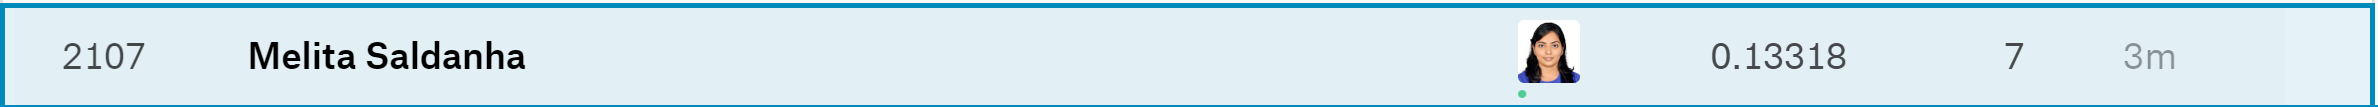

In [58]:
Image("/content/drive/My Drive/Fall 2019/CSE 519 - DSF/HW 3 - Housing Prices/KaggleRank.PNG", width=1000)